In [1]:
# IMPORT PACKAGES
from em_examples.Base import widgetify
import em_examples.InductionLoop as IND
from ipywidgets import interact, FloatSlider, FloatText

Efficiency Warning: Interpolation will be slow, use setup.py!

            python setup.py build_ext --inplace
    


## Parameter Descriptions

<img style="float: right; width: 500px" src="https://github.com/geoscixyz/em_apps/blob/master/images/InductionLoop.png?raw=true">

Below are the adjustable parameters for widgets within this notebook:

* $I_p$: Transmitter current amplitude [A]
* $a_{Tx}$: Transmitter loop radius [m]
* $a_{Rx}$: Receiver loop radius [m]
* $x_{Rx}$: Receiver x position [m]
* $z_{Rx}$: Receiver z position [m]
* $\theta$: Receiver normal vector relative to vertical [degrees]
* $R$: Resistance of receiver loop [$\Omega$]
* $L$: Inductance of receiver loop [H]
* $f$: Specific frequency [Hz]
* $t$: Specific time [s]

## Supporting Mathematical Theory: Time-Harmonic

Consider a transmitter loop which carries a harmonic primary current of the form:
\begin{equation}
I_p(t) = I_p \textrm{cos} (\omega t)
\end{equation}
According to the Biot-Savart law, this results in a primary magnetic field:
\begin{equation}
\mathbf{B_p} (\mathbf{r},t) = I_p \, \boldsymbol{\beta} \, \textrm{cos} (\omega t)  \;\;\;\; \textrm{where} \;\;\;\;\; \boldsymbol{\beta} = \frac{\mu_0}{4 \pi} \int_C \frac{d \mathbf{l} \times \mathbf{r'}}{|\mathbf{r'}|^2}
\end{equation}
where $\boldsymbol{\beta}$ contains the problem geometry. If the magnetic field is homogeneous through the receiver loop, the primary field generates an EMF within the receiver loop equal to:
\begin{equation}
EMF = - \frac{\partial \Phi}{\partial t} \;\;\;\;\; \textrm{where} \;\;\;\;\; \Phi = A\hat n \cdot \mathbf{B_p} = I_p A \beta_n \, \textrm{cos} (\omega t)
\end{equation}
where $A$ is the area of the receiver loop and $\beta_n$ is the component of $\boldsymbol{\beta}$ along $\hat n$. The EMF induces a secondary current $I_s$ within the receiver loop. The secondary current is defined by the following ODE:
\begin{equation}
V = \omega I_p A \beta_n \, \textrm{sin} (\omega t) = I_s R + L \frac{dI_s}{dt}
\end{equation}
The ODE has a solution of the form:
\begin{equation}
I_s (t) = \alpha \, \textrm{cos} (\omega t - \phi)
\end{equation}
where $\alpha$ is the amplitude of the secondary current and $\phi$ is the phase lag. By solving the ODE, the secondary current induced in the receiver loop is given by:
\begin{equation}
I_s (t) = - \Bigg [ \frac{\omega I_p A \beta_n}{R \, \textrm{sin} \phi + \omega L \, \textrm{cos} \phi} \Bigg ] \, \textrm{cos} (\omega t -\phi) \;\;\;\;\; \textrm{where} \;\;\;\;\; \phi = \textrm{tan}^{-1} \Bigg ( \frac{\omega L}{R} \Bigg ) \, \in \, [\pi/2, \pi ]
\end{equation}
The secondary current has both in-phase and quadrature components, these are given by:
\begin{equation}
\textrm{In phase:} \, I_s (t) = - \Bigg [ \frac{\omega I_p A \beta_n}{R \, \textrm{sin} \phi + \omega L \, \textrm{cos} \phi} \Bigg ] \textrm{cos} \phi \, \textrm{cos} (\omega t)
\end{equation}
and
\begin{equation}
\textrm{Quadrature:} \, I_s (t) = - \Bigg [ \frac{\omega I_p A \beta_n}{R \, \textrm{sin} \phi + \omega L \, \textrm{cos} \phi} \Bigg ] \textrm{sin} \phi \, \textrm{sin} (\omega t)
\end{equation}

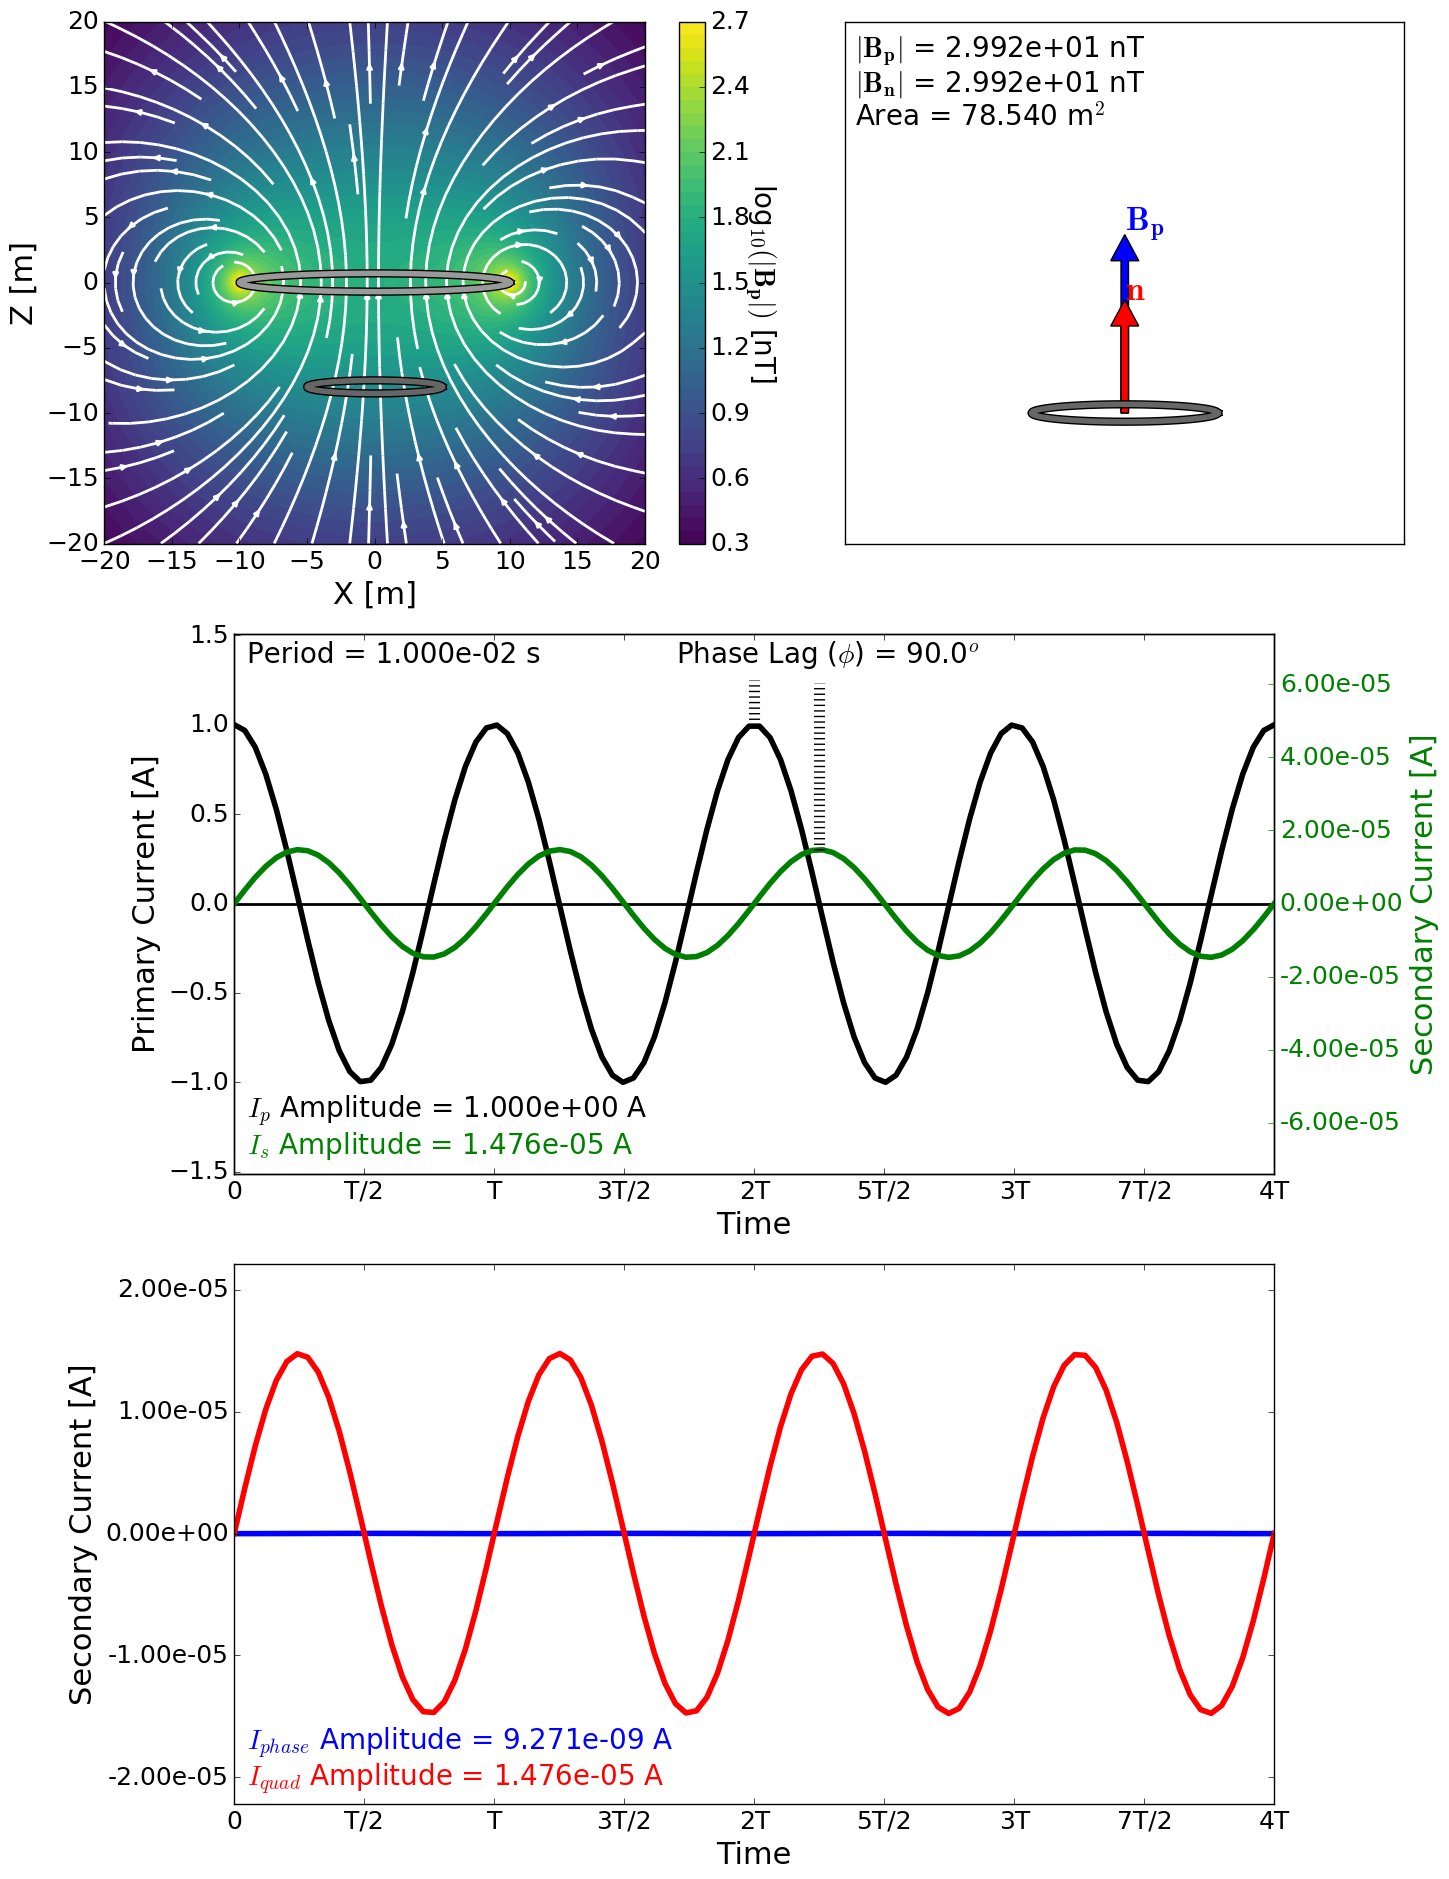

In [2]:
# RUN COSINE WIDGET
widgetify(IND.fcn_Cosine_Widget,I=FloatText(min=0.01,max=100.,value=1.,description = "$I_p$"),\
                        a1=FloatText(min=1.,max=20.,value=10.,description = "$a_{Tx}$"),\
                        a2=FloatText(min=1.,max=20.,value=5.,description = "$a_{Rx}$"),\
                        xRx=FloatText(min=-15.,max=15.,value=0.,description = "$x_{Rx}$"),\
                        zRx=FloatText(min=-15.,max=15.,value=-8.,description = "$z_{Rx}$"),\
                        azm=FloatText(min=-90.,max=90.,value=0.,description = "$\\theta$"),\
                        R=FloatText(min=1e0,max=1e6,value=1e2,description = "$R$"),\
                        L=FloatText(min=1e-7,max=1e-2,value=1e-4,description = "$L$"),\
                        f=FloatText(min=1e0,max=1e8,value=1e2,description = "$f$"))

## Supporting Mathematical Theory: Frequency-Domain Harmonic

Consider a transmitter loop which carries a harmonic primary current of the form:
\begin{equation}
I_p(\omega) = I_p \textrm{e}^{- i \omega t}
\end{equation}
According to the Biot-Savart law, this results in a primary magnetic field:
\begin{equation}
\mathbf{B_p} (\mathbf{r},\omega) = I_p \, \boldsymbol{\beta} \, \textrm{e}^{-i \omega t}  \;\;\;\; \textrm{where} \;\;\;\;\; \boldsymbol{\beta} = \frac{\mu_0}{4 \pi} \int_C \frac{d \mathbf{l} \times \mathbf{r'}}{|\mathbf{r'}|^2}
\end{equation}
where $\boldsymbol{\beta}$ contains the problem geometry. Assume the magnetic field is homogeneous through the receiver loop. By suppressing $\textrm{e}^{-i\omega t}$, the primary field generates an EMF within the receiver loop equal to:
\begin{equation}
EMF = - i\omega \Phi \;\;\;\;\; \textrm{where} \;\;\;\;\; \Phi = I_p A \beta_n
\end{equation}
where $A$ is the area of the receiver loop and $\beta_n$ is the component of $\boldsymbol{\beta}$ along $\hat n$. The EMF induces a secondary current $I_s$ within the receiver loop. The secondary current is defined by the following expression:
\begin{equation}
V = - i \omega I_p A \beta_n = I_s \big (R + i\omega L \big )
\end{equation}
Rearranging this expression to solve for the secondary current we obtain
\begin{equation}
I_s (\omega) = - \frac{i \omega I_p A \beta_n}{R + i \omega L}
\end{equation}
The secondary current has both real and imaginary components. These are given by:
\begin{equation}
I_{Re} (\omega) = - \frac{i \omega I_p A \beta_n R}{R^2 + (\omega L)^2}
\end{equation}
and
\begin{equation}
I_{Im} (\omega) = - \frac{ \omega^2 I_p A \beta_n L}{R^2 + (\omega L)^2}
\end{equation}

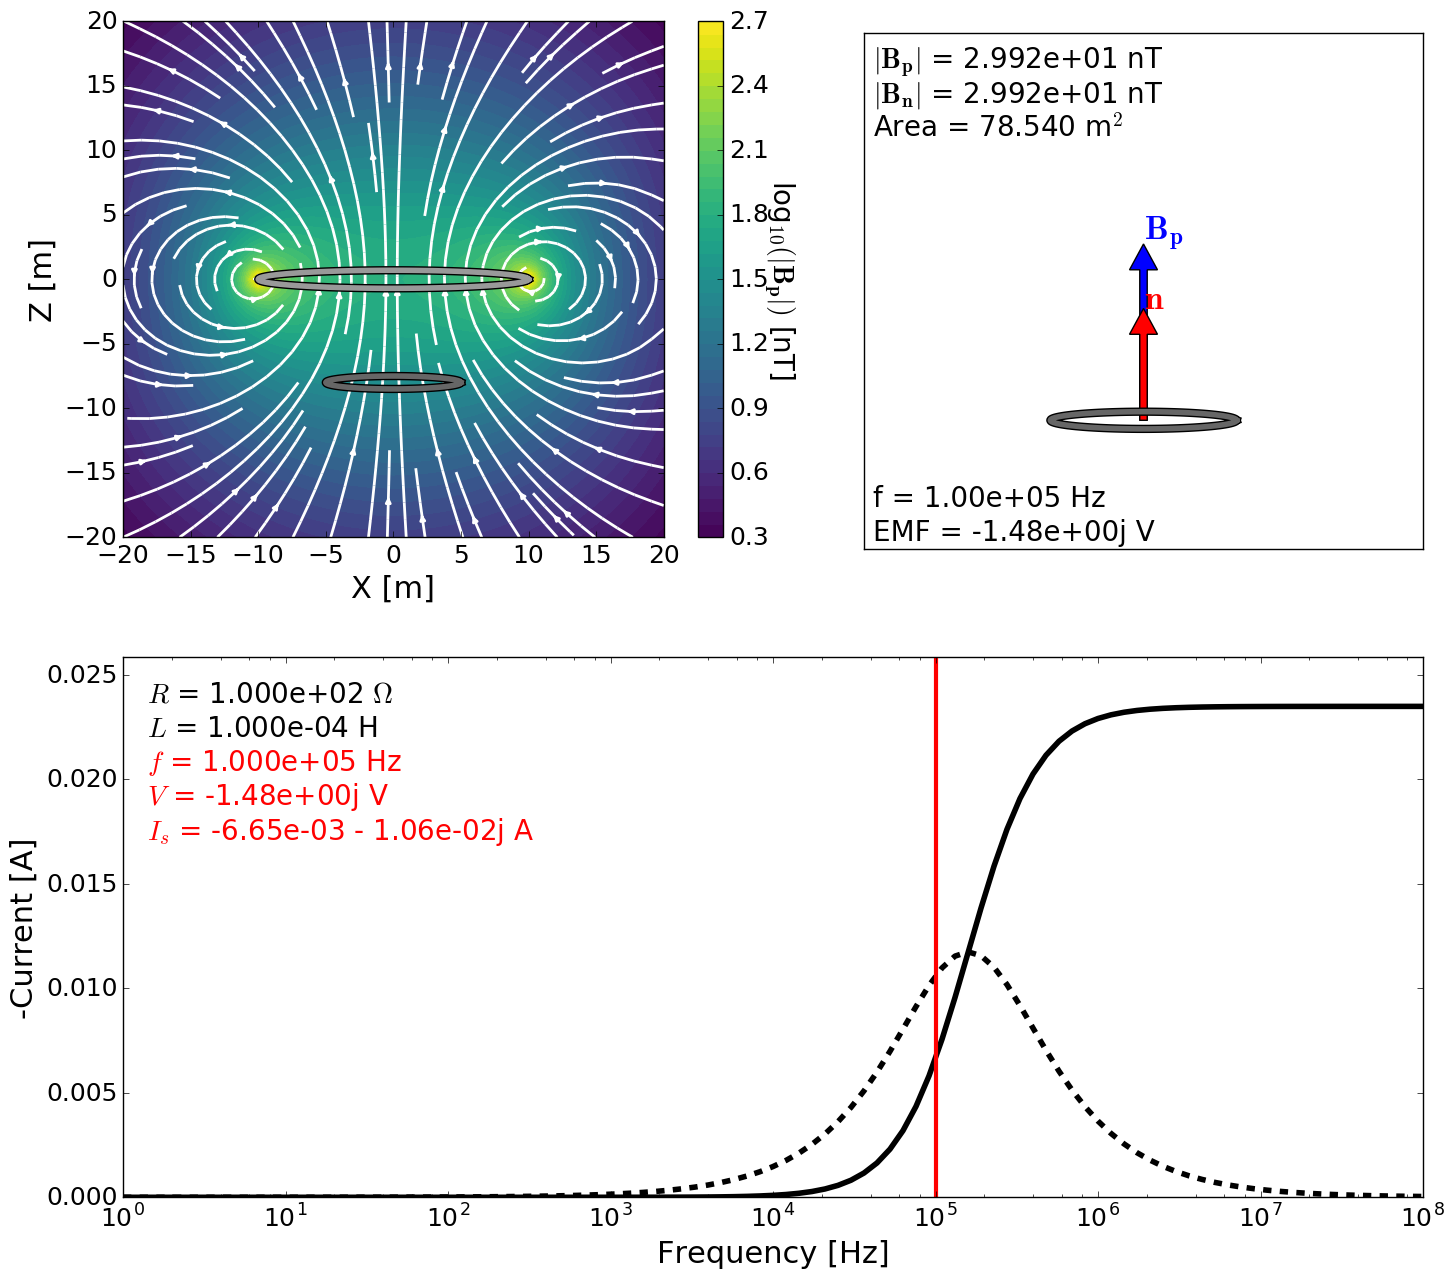

In [3]:
# RUN FREQUENCY DOMAIN WIDGET
widgetify(IND.fcn_FDEM_Widget,I=FloatText(min=0.01,max=100.,value=1.,description = "$I_p$"),\
                        a1=FloatText(min=1.,max=20.,value=10.,description = "$a_{Tx}$"),\
                        a2=FloatText(min=1.,max=20.,value=5.,description = "$a_{Rx}$"),\
                        xRx=FloatText(min=-15.,max=15.,value=0.,description = "$x_{Rx}$"),\
                        zRx=FloatText(min=-15.,max=15.,value=-8.,description = "$z_{Rx}$"),\
                        azm=FloatText(min=-90.,max=90.,value=0.,description = "$\\theta$"),\
                        R=FloatText(min=1e0,max=1e6,value=1e2,description = "$R$"),\
                        L=FloatText(min=1e-7,max=1e-2,value=1e-4,description = "$L$"),\
                        f=FloatText(min=1e0,max=1e8,value=1e5,description = "$f$"))
    
    